In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 80

In [88]:
fileName = "Circle_Torque_controller"

data = pd.read_excel("./Raw Data/"+fileName+".xlsx",names=['timeglobal','xR','yR','thetaR','xD','yD','thetaD','u1','u2','u3','u4','xsim','ysim','thetasim'])
#print(data)
#data = data.set_axis(['timeglobal','xR','yR','thetaR','xD','yD','thetaD','u1','u2','u3','u4','xsim','ysim','thetasim'], axis='index', inplace=False)
#get rid of zeros at the end
dataToDrop = []
for i in range(len(data['timeglobal'])):
    if data['timeglobal'][i]==0:
        dataToDrop = np.append(dataToDrop,i)
        
        
data['xE'] = data.apply(lambda row: row.xD - row.xR, axis = 1)
data['yE'] = data.apply(lambda row: row.yD - row.yR, axis = 1)
data['thetaE'] = data.apply(lambda row: row.thetaD - row.thetaR, axis = 1)

print(data)

      timeglobal   xR   yR  thetaR    xD   yD  thetaD   u1   u2   u3   u4  \
0              1    0    0      -5   907  422       0  -91  160   92 -159   
1              1    0    0      -5   904  427       0  -90  160   91 -159   
2              1    0    0      -5   900  435       0  -88  160   89 -159   
3              1    0    0      -5   899  438       0  -88  160   88 -159   
4              1    0    0      -5   897  443       0  -87  160   87 -159   
5              1    0    0      -5   894  448       0  -85  160   86 -159   
6              1    0    0      -5   891  454       0  -84  160   85 -159   
7              1    0    0      -5   888  459       0  -83  160   83 -159   
8              1    0    0      -5   885  465       0  -82  160   82 -159   
9              1    0    0      -5   882  471       0  -80  160   81 -159   
10             1    0    0      -5   879  476       0  -79  160   80 -159   
11             1    0    0      -5   876  482       0  -78  160   78 -159   

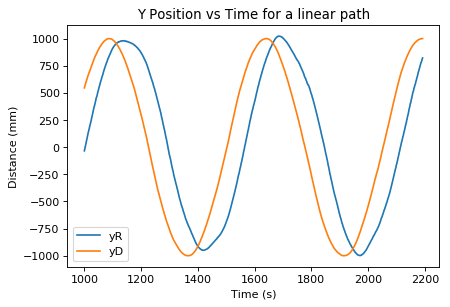

In [89]:
#plt.plot(data['timeglobal'],data['xR'],data['timeglobal'],data['xD'])
plt.plot(data['xR'][1000:])
plt.plot(data['xD'][1000:])
plt.ylabel("Distance (mm)")
plt.xlabel("Time (s)")
plt.legend(["yR","yD"])
plt.title("Y Position vs Time for a linear path")
plt.show()

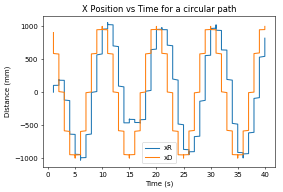

In [80]:
plt.plot(data['timeglobal'],data['xR'],data['timeglobal'],data['xD'])
plt.ylabel("Distance (mm)")
plt.xlabel("Time (s)")
plt.legend(["xR","xD"])
plt.title("X Position vs Time for a circular path")
plt.show()

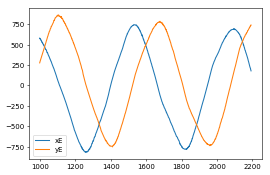

In [81]:
plt.plot(data['xE'][1000:])
plt.plot(data['yE'][1000:])
plt.legend(["xE","yE"])
plt.show()

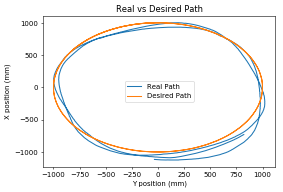

In [82]:
plt.plot(data['xR'][1000:],data['yR'][1000:],data['yD'][1000:],data['xD'][1000:])
plt.xlabel('Y position (mm)')
plt.ylabel('X position (mm)')
plt.legend(['Real Path', 'Desired Path'])
plt.title('Real vs Desired Path')
plt.show()

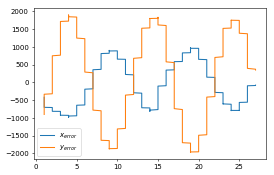

In [83]:
plt.plot(data['timeglobal'][:-745],data['xR'][:-745]-data['yD'][:-745],data['timeglobal'][:-745],data['yR'][:-745]-data['xD'][:-745])
plt.legend(['$x_{error}$','$y_{error}$'])
plt.show()

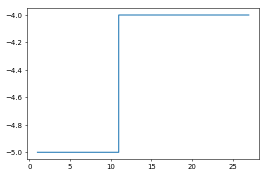

In [84]:
plt.plot(data['timeglobal'][:-700],data['thetaR'][:-700])
plt.show()

In [85]:
xc = (np.average(data['yR'][1000:]))
yc = (np.average(data['xR'][1000:]))

print(xc)
print(yc)

xc=0
yc=0

def dist(x1, y1, x2, y2, r):  
    return np.sqrt(((x2 - x1)** 2) + ((y2 - y1)** 2)) - r;

error = []
for i in range(len(data['xR'][1000:])):
    error = np.append(error,(dist(xc,yc,data['xR'][i+1000],data['yR'][i+1000],1000)))

print(np.sqrt(np.mean(error**2)))

sortederror = np.sort(error)
print(np.sqrt(np.mean(sortederror[:int(len(sortederror)*0.95)]**2)))

-113.018440905
60.1751886002
70.5864245717
58.349030697


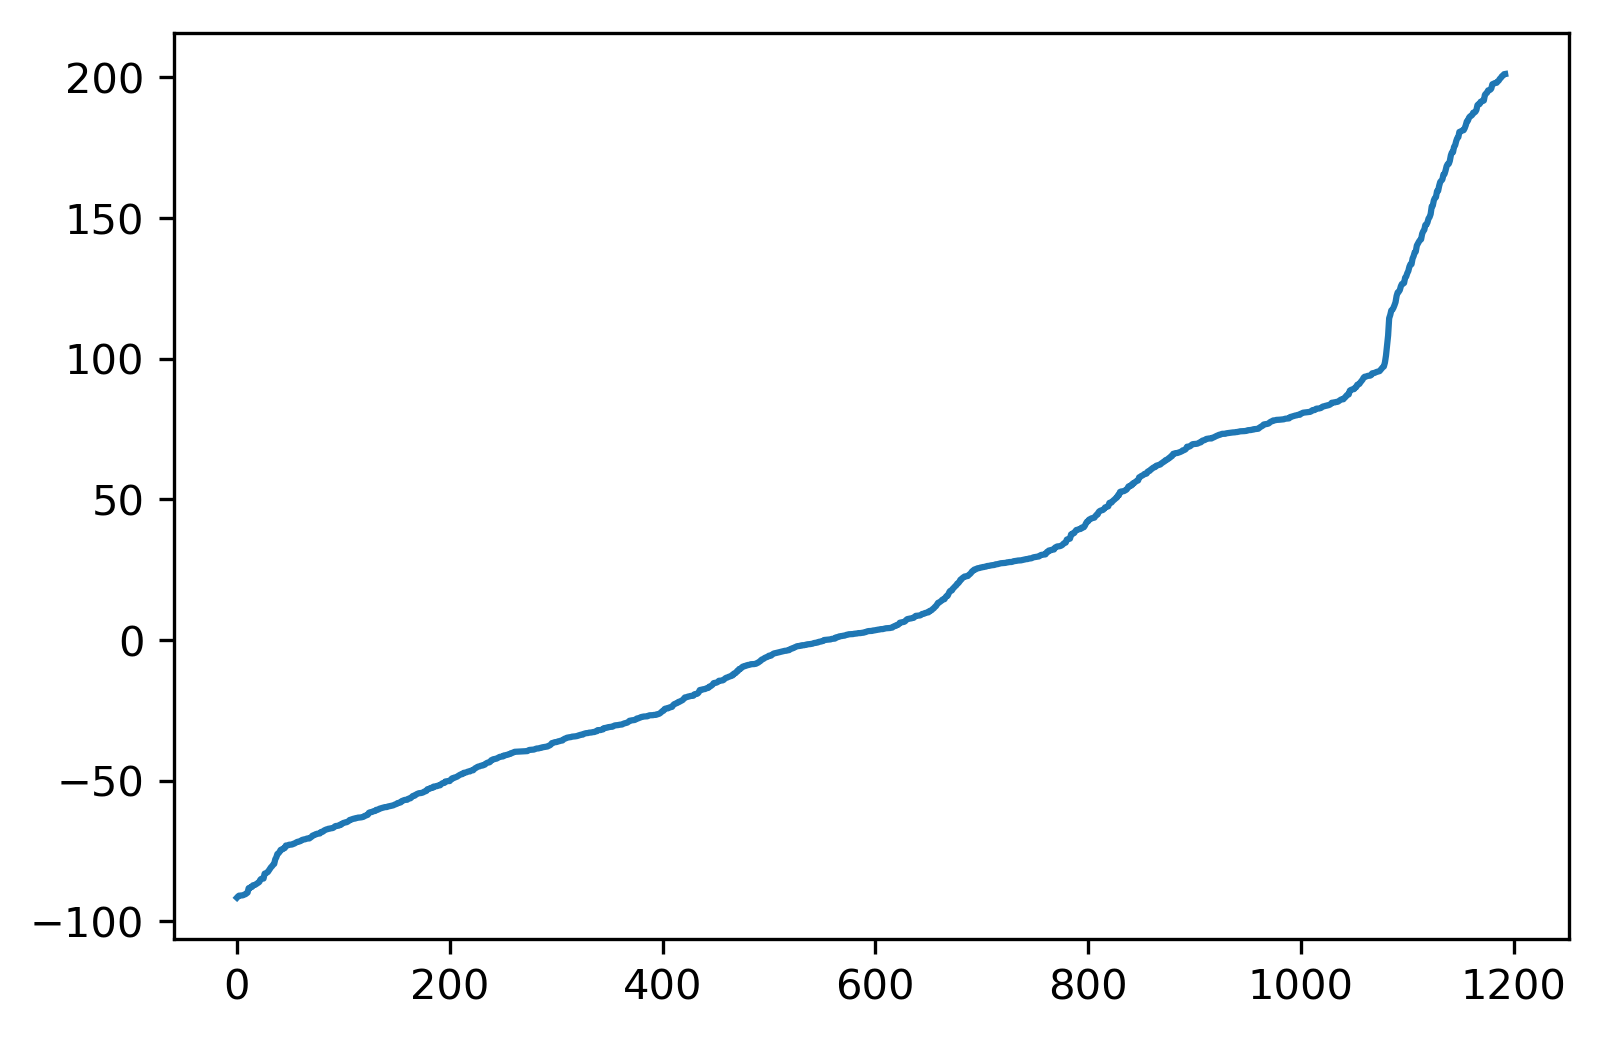

In [69]:
plt.plot(sortederror)
plt.show()

In [45]:
min(error)

0.86105506392581288

In [58]:
distarr=[]

for i in range(len(data['xR'][1000:])):
    distarr = np.append(distarr,(dist(xc,yc,data['xR'][i],data['yR'][i],1000)))


In [60]:
print(max(np.square(distarr)))

1000000.0
